#Open Source Lineage

Analysis of the status and progression of funded open source projects.

In [3]:
import pandas as pd

In [4]:
# Data set stored in GitHub: Import into a Pandas data frame
csv_file = "https://github.com/jmstanto/oslineage/raw/main/NSFopenSourceAwards.csv"

award_data = pd.read_csv(csv_file, encoding = "ISO-8859-1")

In [5]:
award_data.columns # Show the list of variables in the file

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [6]:
# For descriptive purposes, examine a distribution of awards across states
state_groups = award_data.groupby('OrganizationState').agg('count')

state_groups

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,PIEmailAddress,OrganizationStreet,OrganizationCity,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
OrganizationState,,,,,,,,,,,,,,,,,,,,,
AK,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
AL,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,31,32,32
AR,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AZ,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,44,52,52
CA,290,290,290,290,290,290,290,290,290,290,...,289,289,290,290,289,290,290,246,290,290
CO,71,71,71,71,71,71,71,71,71,71,...,69,69,71,71,69,71,71,57,71,71
CT,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,24,29,29
DC,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,18,23,23
DE,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,7,7


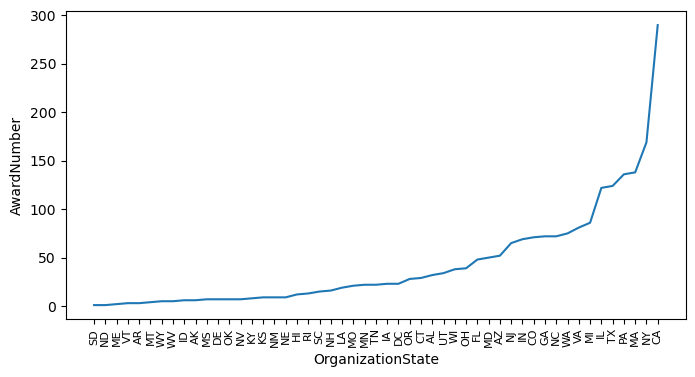

In [7]:
# Now display as a graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sorted_df = state_groups.sort_values('AwardNumber')

#display that sorted df as a line plot
sns.lineplot(x="OrganizationState", y="AwardNumber", sort=False, data=sorted_df)

plt.xticks(rotation=90, fontsize=8)

plt.show()

In [9]:
# Task 1: Convert 'AwardedAmountToDate' to integer and store in a new variable
amount_list = []
awarded_amount = award_data['AwardedAmountToDate']
for index, amount in awarded_amount.items():
    amount_list.append(int(amount[1:-3].replace(',','')))
award_data['AATD'] = amount_list

array([[<Axes: title={'center': 'AATD'}>]], dtype=object)

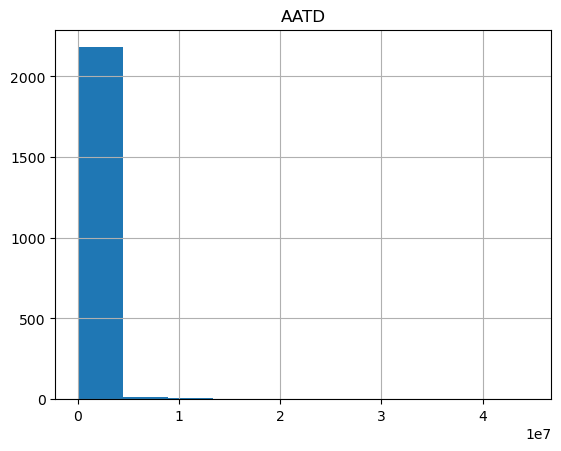

In [10]:
# Task 2: Create a histogram of the integer variable of award amount
award_data.hist(column='AATD')

In [11]:
# Task 3: Convert 'StartDate', 'LastAmendmentDate', and 'EndDate' to
# proper time-date variables
award_data['StartDate'] = pd.to_datetime(award_data['StartDate'])
award_data['LastAmendmentDate'] = pd.to_datetime(award_data['LastAmendmentDate'])
award_data['EndDate'] = pd.to_datetime(award_data['EndDate'])

array([[<Axes: title={'center': 'StartDate'}>]], dtype=object)

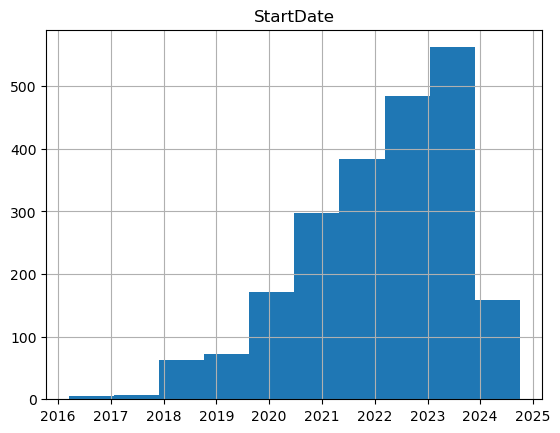

In [12]:
# Task 4: Create a histogram of start dates
award_data.hist(column='StartDate')

In [13]:
# Task 5: Extract a new data frame with just PrincipalInvestigator
# and Co-PIName(s); keep AwardNumber as a unique index
pis_and_copis = award_data[['PrincipalInvestigator', 'Co-PIName(s)']].copy()

In [14]:
# Task 6: Parse Co-PIName(s) into individual lists of strings
# by splitting on the comma; trim leading and trailing spaces
copis = award_data['Co-PIName(s)'].str.split(pat=", ")

In [15]:
# Task 7: Use nested loop to create pairs of PI-coPI names.
# Store in a new data frame
pi_pairs = []
for index, pi in award_data['PrincipalInvestigator'].items():
    if isinstance(copis[index], list):
        for copi in copis[index]:
            pi_pairs.append((pi, copi))

pairs = pd.DataFrame(pi_pairs)
print(pairs)

                           0                     1
0       Karmen Condic-Jurkic          David Mobley
1     Igor Fabio Steinmacher          Marco Gerosa
2      Volodymyr Kindratenko           Daniel Katz
3              Steven Clontz  Shiladitya Chaudhury
4              Steven Clontz           Robin Lasey
...                      ...                   ...
1434      Floris van Breugel         Yvette Fisher
1435      Floris van Breugel     Michael Dickinson
1436      Floris van Breugel        Bingni Brunton
1437      Sebastian Musslick         Michael Frank
1438      Ravit Golan Duncan           Clark Chinn

[1439 rows x 2 columns]


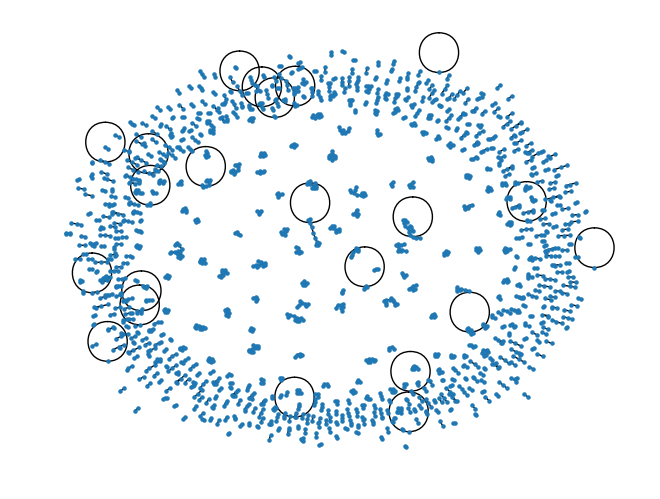

In [59]:
# Task 8: Use the name pairs to create and display a network diagram
import networkx as nx 

G = nx.Graph()

for pair in pi_pairs:
    G.add_edge(pair[0], pair[1])

nx.draw(G, node_size=5, font_size=5)
plt.show()

In [ ]:
# Task 9: Copy the award data into a new DF, keeping only the
# AwardNumber, Title, and Abstract. Use spaCy to create doc
# objects from each title. Store the doc objects on the DF


In [ ]:
# Task 10: Review examples of the tokens generated
# by spaCy for a few of the titles

In [ ]:
# Task 11: Used nested loops to find and display tokens
# from the Title that are designated as entities
# Store the token text for the first entity detected (if any)

In [ ]:
# Task 12: Display the entities and make a note of how many
# titles mention an entity

In [ ]:
# Task 13: Repeat the entity analysis for Abstract, but store the results
# on each row of the DF as a complete list of entities detected

In [ ]:
# Task 14: Use nested loops to expand the list of entities
# in a new DF with one entity per row. Include the award
# number for future reference.

In [ ]:
# Task 15: Create a word cloud of entity texts and use
# group_by to see if there are any entities mentioned
# more than once

In [ ]:
# Task 16: Create an experimental loop that runs just a few examples of the following:
# a - grab the text of an entity name and enclose it in quotes
# b - run a google search of the quoted text
# c - count the number of promising URLs returned
# d - note whether GitHub is among the domain names mentioned
# e - save the GitHub URL if it is in the list

In [ ]:
# Task 17: Using results of the experiment, create a streamlined loop
# that finds and stores GitHub links for as many entities as possible

In [ ]:
# Task 18: Use GitHub API to discover the date of the last update
# of the repository in question, for each project that appears
# to have a repository

In [ ]:
# Task 19: Visualize active versus "expired" and "not found" projects by
# using the last update date

In [ ]:
# Task 20: Use award numbers to link back to the original data
# and create a map of all of the active projects